In [1]:
import pandas as pd

In [5]:
so_far = pd.read_csv('results/first_7600.csv')
today = pd.read_csv('results/final_results.csv')

In [17]:
so_far.describe()
today.describe()

,Unnamed: 0,gpa
count,9999.000000,9976.000000
mean,4999.000000,3.032899
std,2886.607005,0.427340
min,0.000000,1.850000
25%,2499.500000,2.700000
50%,4999.000000,3.000000
75%,7498.500000,3.300000
max,9998.000000,4.000000


In [26]:
today

,Unnamed: 0,symbol,gpa,remarks
0,0,00302467I,2.65,COMPLETED
1,1,00302468J,2.85,COMPLETED
2,2,00302469K,2.80,COMPLETED
3,3,00302470L,2.60,COMPLETED
4,4,00302471M,2.50,COMPLETED
...,...,...,...,...
9994,9994,00410808H,3.60,COMPLETED
9995,9995,00410809I,3.45,COMPLETED
9996,9996,00410810J,3.90,COMPLETED
9997,9997,00410811K,3.90,COMPLETED


In [20]:
new = today.drop(today.columns[0], axis=1)

In [25]:
new

,symbol,gpa,remarks
0,00302467I,2.65,COMPLETED
1,00302468J,2.85,COMPLETED
2,00302469K,2.80,COMPLETED
3,00302470L,2.60,COMPLETED
4,00302471M,2.50,COMPLETED
...,...,...,...
9994,00410808H,3.60,COMPLETED
9995,00410809I,3.45,COMPLETED
9996,00410810J,3.90,COMPLETED
9997,00410811K,3.90,COMPLETED


In [23]:
combined = pd.concat([so_far, new])

In [27]:
combined = combined.sort_values(by=['symbol'])

In [30]:
combined.describe()

,gpa
count,17538.000000
mean,2.947836
std,0.427196
min,1.700000
25%,2.650000
50%,2.900000
75%,3.200000
max,4.000000


In [32]:
combined.to_csv('results/combined.csv')

In [44]:
combined.iloc[[0]]

,symbol,gpa,remarks
0,00100001E,2.55,COMPLETED


In [80]:
symbol_as_num_df = combined
# symbol_as_num_df['as_num'] = int(symbol_as_num_df['symbol'][:-1])

In [88]:
symbol_as_num_df['as_num'] = symbol_as_num_df['symbol'].apply(lambda x: int(x[:-1]))

In [92]:
diff_df = symbol_as_num_df[['gpa', 'as_num']].diff()

In [95]:
gaps = diff_df[diff_df["as_num"] != 1]

In [96]:
gaps

,gpa,as_num
0,NaN,NaN
1932,0.00,98069.0
5133,0.05,96800.0
1653,-1.40,98348.0


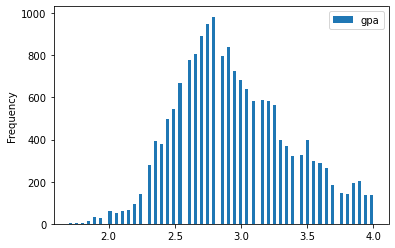

In [116]:
ax = combined[['gpa']].plot.hist(bins=100)

In [122]:
combined[['gpa']].describe()

,gpa
count,17538.000000
mean,2.947836
std,0.427196
min,1.700000
25%,2.650000
50%,2.900000
75%,3.200000
max,4.000000
